### Generate Training Data and Visualize

   time  inventory     demand  lead_time  event
0     0         94  38.881199   2.318902      0
1     1         22  41.147697   1.587812      0
2     2         40  44.191219   1.474830      0
3     3         61  50.222218   1.572207      0
4     4         74  52.220789   1.232023      0


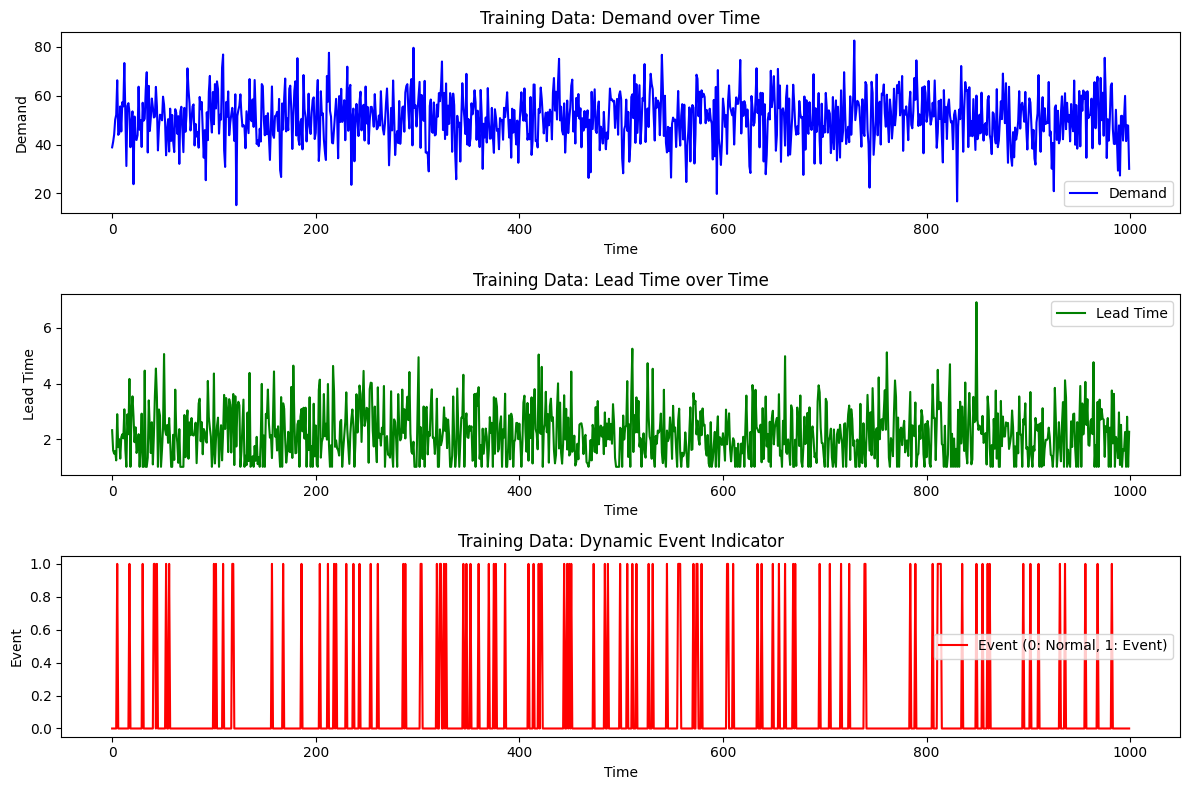

In [1]:
import matplotlib.pyplot as plt 
from src.data.train_data_simulator import generate_offline_data

train_data = generate_offline_data(n_periods=1000, seed=42)
plt.figure(figsize=(12, 8))

# Plot Demand
plt.subplot(3, 1, 1)
plt.plot(train_data['time'], train_data['demand'], label='Demand', color='blue')
plt.title('Training Data: Demand over Time')
plt.xlabel('Time')
plt.ylabel('Demand')
plt.legend()

# Plot Lead Time
plt.subplot(3, 1, 2)
plt.plot(train_data['time'], train_data['lead_time'], label='Lead Time', color='green')
plt.title('Training Data: Lead Time over Time')
plt.xlabel('Time')
plt.ylabel('Lead Time')
plt.legend()

# Plot Dynamic Events
plt.subplot(3, 1, 3)
plt.plot(train_data['time'], train_data['event'], label='Event (0: Normal, 1: Event)', color='red')
plt.title('Training Data: Dynamic Event Indicator')
plt.xlabel('Time')
plt.ylabel('Event')
plt.legend()

plt.tight_layout()
plt.show()

### Train the RL agent using PPO

In [2]:
from src.inventory_env import InventoryEnv
from stable_baselines3 import PPO
from src.config import Config

config = Config()
env_train = InventoryEnv(offline_data=train_data)
rl_model = PPO('MlpPolicy', env_train, verbose=0, tensorboard_log=config.training_log_dir)
rl_model.learn(total_timesteps=config.n_steps, progress_bar=True)
rl_model.save(config.model_path)

/Users/chu/miniconda3/envs/OGRL/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Output()

### Generate Test Data and Visualize

   time  inventory     demand  lead_time  event
0     0         94  33.321798   2.637804      0
1     1         22  36.721545   1.175623      0
2     2         40  41.286828   1.000000      0
3     3         61  50.333327   1.144414      0
4     4         74  53.331184   1.000000      0


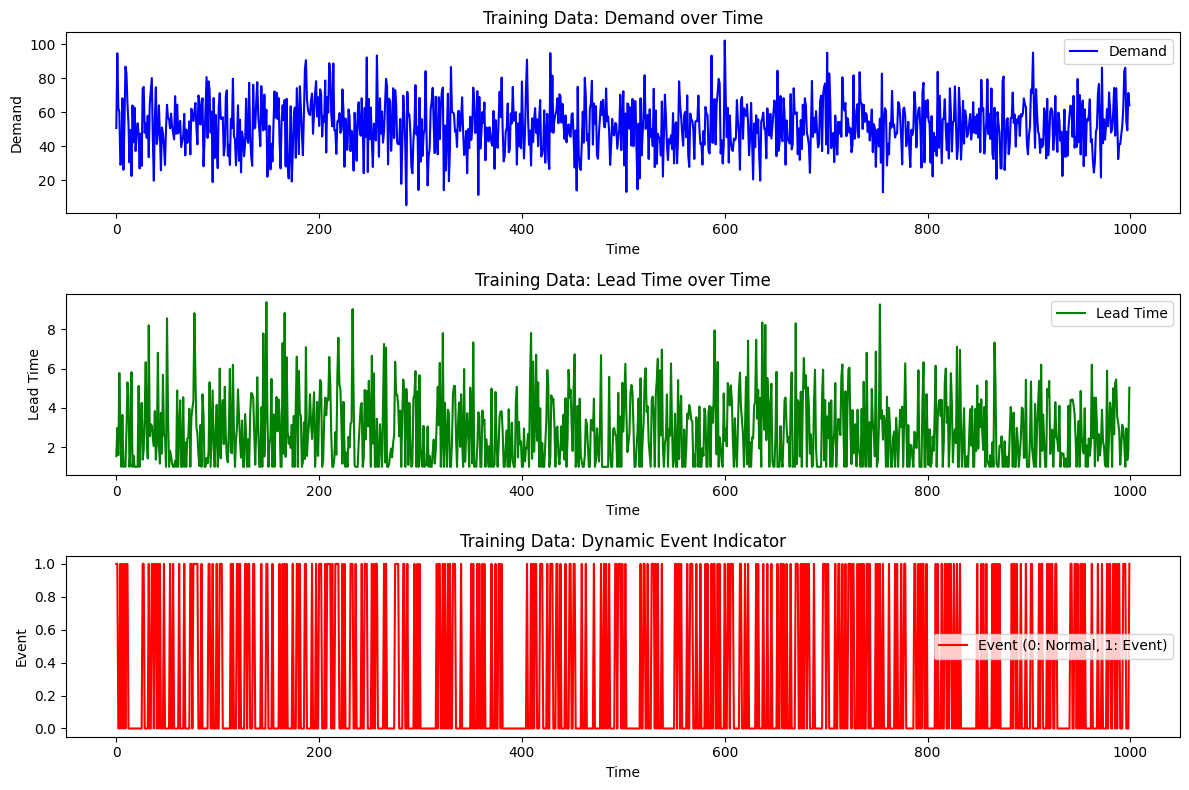

In [3]:
from src.data.test_data_simulator import generate_test_data

# Generate test data and evaluate performance
test_data = generate_test_data(n_periods=1000, seed=24)

plt.figure(figsize=(12, 8))

# Plot Demand
plt.subplot(3, 1, 1)
plt.plot(test_data['time'], test_data['demand'], label='Demand', color='blue')
plt.title('Training Data: Demand over Time')
plt.xlabel('Time')
plt.ylabel('Demand')
plt.legend()

# Plot Lead Time
plt.subplot(3, 1, 2)
plt.plot(test_data['time'], test_data['lead_time'], label='Lead Time', color='green')
plt.title('Training Data: Lead Time over Time')
plt.xlabel('Time')
plt.ylabel('Lead Time')
plt.legend()

# Plot Dynamic Events
plt.subplot(3, 1, 3)
plt.plot(test_data['time'], test_data['event'], label='Event (0: Normal, 1: Event)', color='red')
plt.title('Training Data: Dynamic Event Indicator')
plt.xlabel('Time')
plt.ylabel('Event')
plt.legend()

plt.tight_layout()
plt.show()

### Load the trained RL model and Compare Performances with Pure RL and Pure RO

In [4]:
from src.performance_evaluation import PerformanceEvaluator
from src.robust_optimization import robust_order_quantity

# Load the trained RL model
rl_model = PPO.load(config.model_path, env=env_train)


evaluator = PerformanceEvaluator(
    test_data=test_data,
    env_class=InventoryEnv,
    robust_optimizer=robust_order_quantity,
    rl_model=rl_model,
)

performance_table = evaluator.evaluate_all_methods()
print("\nPerformance Evaluation:")
print(performance_table)

ModuleNotFoundError: No module named 'config'